#Presidential State of the Union Addresses
This project is an investigation into the State of the Union addresses given by presidents in the year of an impending election wherein they were incumbents. By using supervised and unsupervised techniques, I intend to uncover trends in the word usage in these addresses to see if there are trends among the presidential speeches (unsupervised) and if these can be used to predict the outcome of the election or the percentage of popular vote received by the candidate in the election following the speech (supervised).

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

Presidential SOTU addresses taken from Github

In [0]:

Buren_upload = open ('Buren_1840.txt').read()
Cleveland_upload = open ('Cleveland_1888.txt').read()
Clinton_upload = open ('Clinton_1996.txt').read()
Jackson_upload = open ('Jackson_1832.txt').read()
Johnson_upload= open ('Johnson_1964.txt').read()
Lincoln_upload = open ('Lincoln_1864.txt').read()
Obama_upload = open ('Obama_2012.txt').read()
Reagan_upload = open ('Reagan_1984.txt').read()
Roose_1_upload = open('Roosevelt_1904.txt').read()
Roose_2_upload = open ('Roosevelt_1936.txt').read()


In [0]:
#president_SOTU = pd.read_csv(r'https://github.com/harr1582/Presidential-SOTU/blob/master/Buren_1840.txt')

## Cleaning


In [0]:
#Takes apart the dictionary into just values and returns to variable assigned

# bur_loss = list(Buren_upload.values())
# clev_loss = list(Cleveland_upload.values())
# clint = list(Clinton_upload.values())
# jack = list(Jackson_upload.values())
# john = list(Johnson_upload.values())
# roose = list(Roose_1_upload.values())
# fdr = list (Roose_2_upload.values())
# linc = list(Lincoln_upload.values())
# obam = list(Obama_upload.values())
# reag = list(Reagan_upload.values())

# #Turns list into string
# roose_str = ' '.join(str(x) for x in roose)
# clint_str = ' '.join(str(x) for x in clint)
# bur_str = ' '.join(str(x) for x in bur_loss)
# clev_loss_str = ' '.join(str(x) for x in clev_loss)
# fdr_str = ' '.join(str(x) for x in fdr)
# linc_str = ' '.join(str(x) for x in linc)
# obam_str = ' '.join(str(x) for x in obam)
# jack_str = ' '.join(str(x) for x in jack)
# john_str = ' '.join(str(x) for x in john)
# reag_str = ' '.join(str(x) for x in reag)


In [0]:

#Getting rid of newlines and first random letter/space

roose_str = re.sub(r'\n', ' ', Roose_1_upload)
clint_str = re.sub(r'\n', ' ', Clinton_upload)
clev_loss_str =  re.sub(r'\n', ' ', Cleveland_upload)
bur_str = re.sub(r'\n', ' ', Buren_upload)
fdr_str =  re.sub(r'\n', ' ', Roose_2_upload)
linc_str =  re.sub(r'\n', ' ', Lincoln_upload)
obam_str =  re.sub(r'\n', ' ', Obama_upload)
jack_str =  re.sub(r'\n', ' ', Jackson_upload)
john_str =  re.sub(r'\n', ' ', Johnson_upload)
reag_str =  re.sub(r'\n', ' ', Reagan_upload)

roosevelt = roose_str[2:]
clinton = clint_str[2:]
cleveland =  clev_loss_str[2:]
buren = bur_str[2:]
fd_roose =  fdr_str[2:]
lincoln = linc_str[2:]
obama =  obam_str[2:]
jackson = jack_str[2:]
johnson =  john_str[2:]
reagan =  reag_str[2:]

In [34]:
reag_str

'Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens:  Once again, in keeping with time-honored tradition, I have come to report to you on the state of the Union, and I\'m pleased to report that America is much improved, and there\'s good reason to believe that improvement will continue through the days to come.  You and I have had some honest and open differences in the year past. But they didn\'t keep us from joining hands in bipartisan cooperation to stop a long decline that had drained this nation\'s spirit and eroded its health. There is renewed energy and optimism throughout the land. America is back, standing tall, looking to the eighties with courage, confidence, and hope.  The problems we\'re overcoming are not the heritage of one person, party, or even one generation. It\'s just the tendency of government to grow, for practices and programs to become the nearest thing to eternal life we\'ll ever see on this Earth. And there\'

Parsing

In [0]:
import spacy
nlp = spacy.load('en')


# All the processing work is done here, so it may take a while.
roosevelt = nlp(roosevelt)
clinton= nlp(clinton)
cleveland = nlp(cleveland)
buren = nlp(buren)
fd_roose = nlp(fd_roose)
lincoln = nlp(lincoln)
obama = nlp(obama)
jackson = nlp(jackson)
johnson = nlp(johnson)
reagan = nlp(reagan)

## Exploration


In [36]:
# Let's explore the objects we've built.
print("The roose object is a {} object.".format(type(roosevelt)))
print("It is {} tokens long".format(len(roosevelt)))
print("The first three tokens are '{}'".format(roosevelt[:3]))
print("The type of each token is {}".format(type(roosevelt[0])))

The roose object is a <class 'spacy.tokens.doc.Doc'> object.
It is 19244 tokens long
The first three tokens are ' the Senate'
The type of each token is <class 'spacy.tokens.token.Token'>


In [37]:
#Find the most common words

from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
      if token.text == 'The':
        print(token)
        print(token.is_stop)
        return Counter(words)
      if not token.is_punct and (not token.is_stop or include_stop):
        words.append(token.text)
            
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
roose_freq = word_frequencies(roosevelt).most_common(10)

print(roose_freq)


The
False
[(' ', 2), ('the', 1), ('Senate', 1), ('and', 1), ('House', 1), ('of', 1), ('Representatives', 1)]


In [38]:
spacy.__version__

'2.0.18'

In [0]:
#!pip install spacy -U

Code still including stop words (?) based on caps. Including spaces as well

In [40]:
# Use our optional keyword argument to remove stop words.
roose_freq = word_frequencies(roosevelt, include_stop=False).most_common(10)

print('Roose:', roose_freq)


The
False
Roose: [(' ', 2), ('Senate', 1), ('House', 1), ('Representatives', 1)]


In [41]:
# Utility function to calculate how frequently lemas appear in the text.
def lemma_frequencies(text, include_stop=True):
    
    # Build a list of lemas.
    # Strip out punctuation and, optionally, stop words.
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    # Build and return a Counter object containing word counts.
    return Counter(lemmas)

# Instantiate our list of most common lemmas.
roose_lemma_freq = lemma_frequencies(roosevelt, include_stop=False).most_common(10)

print('Roose Lemmas:', roose_lemma_freq)


Roose Lemmas: [('-PRON-', 139), ('the', 129), (' ', 119), ('man', 65), ('government', 63), ('law', 61), ('great', 54), ('work', 54), ('good', 51), ('nation', 49)]


In [42]:
# Initial exploration of sentences.
sentences = list(roosevelt.sents)
print("Roosevelt's State of the Union Address has {} sentences.".format(len(sentences)))

example_sentence = sentences[2]
print("Here is an example: \n{}\n".format(example_sentence))
print('\nParts of speech:')
for token in example_sentence[:9]:
    print(token.orth_, token.pos_)
    print('\nDependencies:')
for token in example_sentence[:9]:
    print(token.orth_, token.dep_, token.head.orth_)

Roosevelt's State of the Union Address has 535 sentences.
Here is an example: 
Such prosperity is of course primarily due to the high individual average of our citizenship, taken together with our great natural resources; but an important factor therein is the working of our long-continued governmental policies.


Parts of speech:
Such ADJ

Dependencies:
prosperity NOUN

Dependencies:
is VERB

Dependencies:
of ADP

Dependencies:
course NOUN

Dependencies:
primarily ADV

Dependencies:
due ADP

Dependencies:
to ADP

Dependencies:
the DET

Dependencies:
Such amod prosperity
prosperity nsubj is
is ROOT is
of prep is
course pobj of
primarily advmod due
due acomp is
to prep due
the det average


In [43]:
# Extract the first ten entities.
entities = list(roosevelt.ents)[0:10]
for entity in entities:
    print(entity.label_, ' '.join(t.orth_ for t in entity))

NORP  
ORG Senate
ORG House of Representatives
ORG Nation
ORG the National Government
PERSON Battle
ORDINAL second
ORG Nation
GPE States
DATE the last half century


In [44]:
people = [entity.text for entity in list(roosevelt.ents) if entity.label_ == "PERSON"]
print(set(people))

{'James', 'Salmon', 'Wright', 'Good Americanism', 'Powers', 'McKinley', 'Gaynor', 'Beavers', 'Sooner', 'Green', 'Battle', 'Canyon', "Major L'Enfant", 'Revised Statutes'}


In [45]:
# Look at some metrics around this sentence.
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

There are 36 words in this sentence, and 30 of them are unique.


##Getting ready to model

In [6]:
roose_sents = [[sent, "T_Roosevelt", 56.4, 1904, 1] for sent in roosevelt.sents]
clint_sents = [[sent, "Clinton", 49.2, 1996, 1] for sent in clinton.sents]
clev_sents = [[sent, "Cleveland", 48.6, 1888, 0] for sent in cleveland.sents]
buren_sents = [[sent, "Buren", 46.8, 1840, 0] for sent in buren.sents]
fd_roose_sents = [[sent, "F_Roosevelt", 60.2, 1936, 1] for sent in fd_roose.sents]
linc_sents = [[sent, "Lincoln", 55.0, 1864, 1] for sent in lincoln.sents]
obama_sents =[[sent, "Obama", 50.9, 2012, 1] for sent in obama.sents]
jackson_sents = [[sent, "Jackson", 54.2, 1832, 1] for sent in jackson.sents]
johnson_sents = [[sent, "Johnson", 61.1, 1964, 1] for sent in johnson.sents]
reagan_sents = [[sent, "Reagan", 58.8, 1984, 1] for sent in reagan.sents]


sentences = pd.DataFrame(roose_sents + clint_sents + clev_sents + buren_sents + fd_roose_sents + linc_sents + obama_sents + jackson_sents + johnson_sents + reagan_sents)
sentences.head()

,0,1,2,3,4
0,"( , the, Senate, and, House, of, Representativ...",T_Roosevelt,56.4,1904,1
1,"(The, Nation, continues, to, enjoy, noteworthy...",T_Roosevelt,56.4,1904,1
2,"(Such, prosperity, is, of, course, primarily, ...",T_Roosevelt,56.4,1904,1
3,"(The, people, have, emphatically, expressed, t...",T_Roosevelt,56.4,1904,1
4,"(The, enlargement, of, scope, of, the, functio...",T_Roosevelt,56.4,1904,1


In [0]:
sentences['text_sentence']= sentences[0]
sentences['president']= sentences[1]
sentences['popular_vote']=sentences[2]
sentences['year']=sentences[3]
sentences['outcome']=sentences[4]

In [0]:
#token.text for token in sent for sent in roosevelt.sents
#[[token.text for token in sent] for sent in doc.sents] 
#[sent.string for sent in doc.sents] 

In [0]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['president'] = sentences[1]
    df['popular_vote'] = sentences[2]
    df['year']= sentences[3]
    df['outcome'] = sentences[4]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
roose_words = bag_of_words(roosevelt)
clint_words = bag_of_words(clinton)
clev_words = bag_of_words(cleveland)
bur_words = bag_of_words(buren)
fd_roose_words = bag_of_words(fd_roose)
linc_words = bag_of_words(lincoln)
obam_words = bag_of_words(obama)
jackson_words = bag_of_words(jackson)
john_words = bag_of_words(johnson)
reagan_words = bag_of_words(reagan)


# Combine bags to create a set of unique words.
common_words = set(roose_words + clint_words + clev_words + bur_words + fd_roose_words + linc_words + obam_words + jackson_words + john_words + reagan_words)

In [9]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950
Processing row 2000
Processing row 2050
Processing row 2100
Processing row 2150
Processing row 2200
Processing row 2250
Processing row 2300
Processing row 2350
Processing row 2400
Processing row 2450
Processing row 2500
Pro

,commence,unencumbered,emigration,individualism,thousand,introduce,bondage,suppression,preexist,innocent,confusion,"24,549",above,two,cairo,bullet,custom,breadwinner,hoover,plant,economically,invite,businessman,subordinate,alternative,everybody,precautionary,endless,purchasing,medicare,hiring,oblige,oppression,tv,discreet,north,heroism,ancestor,arbiter,intercourse,...,owing,wag,maine,civil,submission,up,entangling,sorrow,tool,vest,armed,exempt,walking,body,march,protract,lasting,party,protestant,"152,362,116.70",fullness,african,west,1972,satisfy,presently,exceptional,warrant,complain,bond,271,canada,rewarding,murderous,amply,prerequisite,strand,bearing,text_sentence,popular_vote
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"( , the, Senate, and, House, of, Representativ...",56.4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(The, Nation, continues, to, enjoy, noteworthy...",56.4
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(Such, prosperity, is, of, course, primarily, ...",56.4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(The, people, have, emphatically, expressed, t...",56.4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(The, enlargement, of, scope, of, the, functio...",56.4


# Cluster work

In [0]:
target = sentences[1]
data = np.array(word_counts.drop(['text_sentence','president', 'year', 'popular_vote', 'outcome'], 1))
#data = np.array(word_counts.drop(['text_sentence','president'], 1))

Question:

*   Why do we want this as an array instead of a dataframe?




In [0]:
len(target)

In [0]:
sentences[1].value_counts()

Divide into training and test sets and normalize X. Y_pred is a fitting to KMeans?

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )

X_norm = normalize(X_train)

# Reduce it to two components.
#X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred_kmeans = KMeans(n_clusters=10, random_state=42).fit_predict(X_norm)

# Plot the solution.
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
# plt.show()

# Check the solution against the data.
# print('Comparing k-means clusters against the data:')
# print(pd.crosstab(y_pred, y_train))
len(X_norm)

2093

#Normalizing x reduces it's size so it can't fit into the models with y_train

#Makes sense to me to use Lasso to Reduce the features

In [0]:


# #Numeric target for lasso
# y_train_lass = sentences[3]


# #turn y_train_lass into an array so it works in model
# from numpy import array
# y_tr_lass = array(y_train_lass)

# y_tr_lass.reshape(1,-1)

# print (X_train.shape)
# print (y_tr_lass.shape)

In [13]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=.35)   #will need to optimize. see coral code
lassfit = lass.fit(data, sentences[3])

print('R^2 for Lasso:', lass.score(data, sentences[3]))


R^2 for Lasso: 0.4319883354203958


In [14]:

from sklearn import ensemble
RandForest= ensemble.RandomForestRegressor()

RandForest.fit(data, sentences[3])

RandForest.feature_importances_
RandForest_ft_series = pd.Series(data=RandForest.feature_importances_, index=data.columns)
###################################
sorted_series = RandForest_ft_series.sort_values(ascending = False)
sorted_series


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AttributeError: ignored

#Evaluating how many clusters are needed.

In [0]:
from sklearn.model_selection import train_test_split

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    y_pred,
    test_size=0.5,
    random_state=42)


X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)


In [20]:
#KMeans: Checking consistency of coefficients for 4 clusters with Silhouette

from sklearn import metrics
from sklearn.metrics import pairwise_distances


sil_3 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    sil_3.append(metrics.silhouette_score(sample, labels, metric='euclidean'))

    
sil_4 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    sil_4.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
    
sil_5 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=5, random_state=42).fit(sample)
    labels = model.labels_
    sil_5.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    

print('Cross val of 3 clusters:', sil_3)
print('Stdev of  clusters:', np.std(sil_3))
    
print('\nCross val of 4 clusters:', sil_4)
print('Stdev of 4 clusters:', np.std(sil_4))

    
print('\nCross val of 5 clusters:', sil_5)
print('Stdev of 5 clusters:', np.std(sil_5))
#

Cross val of 3 clusters: [0.02033625351323893, 0.019642051304178003, 0.022470261963021227, 0.0227738892373093]
Stdev of  clusters: 0.0013434412572279986

Cross val of 4 clusters: [0.023143748951572552, 0.021001553522634588, 0.024509632316105607, 0.02158507482286717]
Stdev of 4 clusters: 0.0013712278740477828

Cross val of 5 clusters: [0.02751340824871659, 0.019467578878156054, 0.015000233118155218, 0.020132147029939495]
Stdev of 5 clusters: 0.004489803090433255


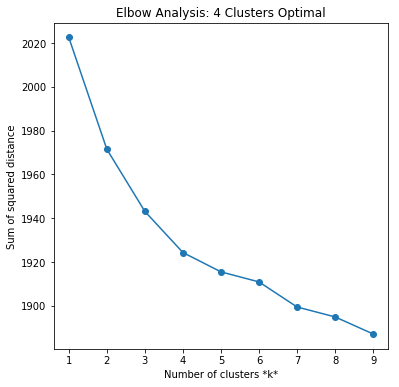

In [21]:
#Elbow plot
sse = []
list_k = list(range(1, 10 ))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_norm)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')

plt.ylabel('Sum of squared distance')
plt.title('Elbow Analysis: 4 Clusters Optimal');

#Forming Clusters

Now I get why X_norm[:, 0 ] and X_norm[:, 1] were used. It was PCA one and PCA 2

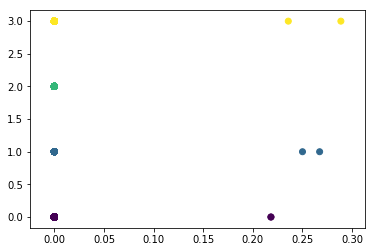

col_0          0   1   2   3
1                           
Buren         60  28  17  34
Cleveland     44  69  17  59
Clinton      102  92  89   9
F_Roosevelt   54  33  28   9
Jackson       67  36  23  26
Johnson       36  45  18   2
Lincoln       56  31  30  40
Obama        155  75  80  13
Reagan        94  51  64  15
T_Roosevelt  173  60  65  94


In [23]:
target = sentences[1]
data = np.array(word_counts.drop(['text_sentence','president', 'year', 'popular_vote', 'outcome'], 1))


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )

X_norm = normalize(X_train)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_norm[:, 0], y_pred, c=y_pred)
plt.show()

# Check the solution against the data.
# print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

In [0]:

len(X_norm[:, 1])
y_pred

y_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(X_norm)

plt.scatter(sentences[1], y_pred, c=y_pred)

plt.title('Four Clusters Representing SOTU data')
plt.show()
print ('Stdev:', y_pred.std())
pd.crosstab(y_train, y_pred)



#tSNE

In [0]:
from sklearn.manifold import TSNE
# sample data set

X_embedded = TSNE(n_components=1).fit_transform(X_train)

In [0]:
X_embedded.shape

In [0]:

# #turn y_train into an array so it works in model
#  from numpy import array
# y_tr_SNE = array(y_train)
# y_tr_SNE.reshape(1,-1)
# y_tr_SNE.shape


ValueError: ignored

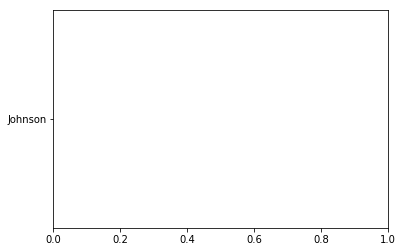

In [35]:
#tSNE clustering

X_embedded = TSNE(n_components=2).fit_transform(X_train)
plt.scatter(X_embedded,y_train)
print(pd.crosstab(y_train, y_pred))

In [0]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [27]:

X = data
y = target
print(X.shape, y.shape)


(2791, 5613) (2791,)


In [28]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))



Size of the dataframe: (2791, 5615)


In [0]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.0236662  0.02254403 0.01432163]


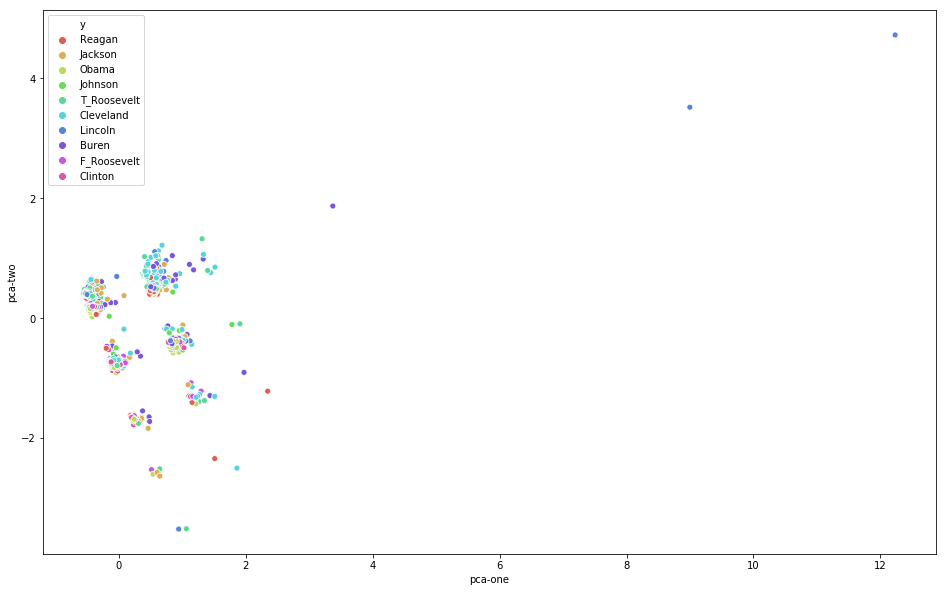

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)

In [32]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.0236662  0.02254403 0.01432162]


In [33]:

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2791 samples in 1.440s...
[t-SNE] Computed neighbors for 2791 samples in 120.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2791
[t-SNE] Computed conditional probabilities for sample 2000 / 2791
[t-SNE] Computed conditional probabilities for sample 2791 / 2791
[t-SNE] Mean sigma: 0.799161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 149.975082
[t-SNE] KL divergence after 300 iterations: 6.183522


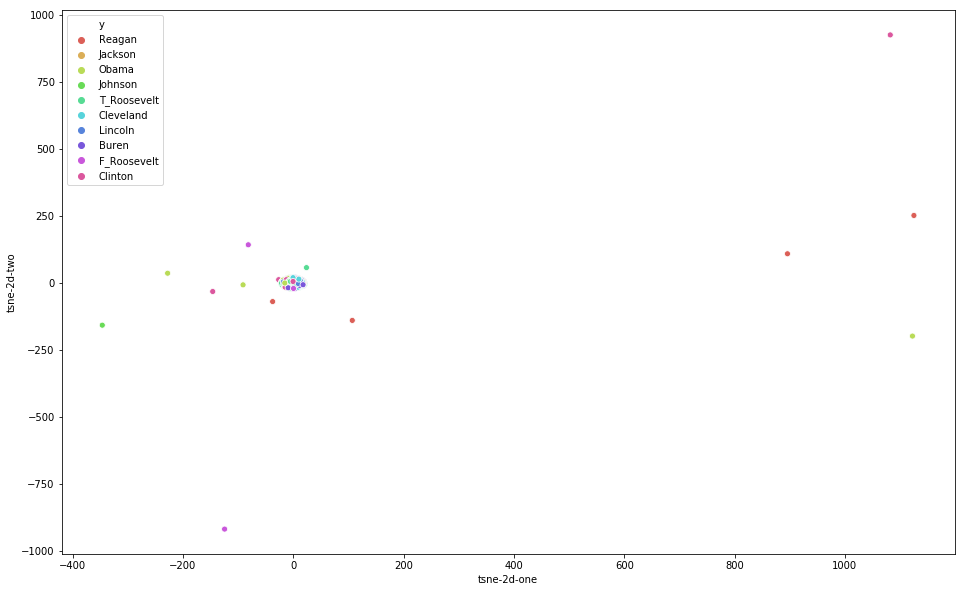

In [34]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

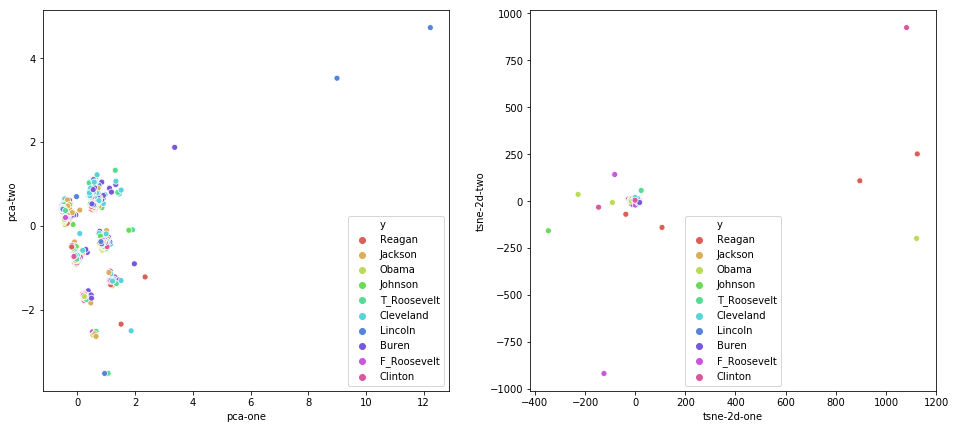

In [36]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    ax=ax2)

In [37]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.2613522758431942


#Cluster with PCA

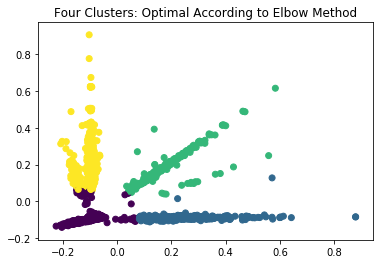

Stdev: 1.1817450583856137
col_0          0   1   2   3
1                           
Buren         86  18  15  20
Cleveland     72  16  24  77
Clinton      110  87  37  58
F_Roosevelt   60  27  16  21
Jackson       82  22  17  31
Johnson       35  19  21  26
Lincoln       80  30  15  32
Obama        165  78  25  55
Reagan       106  63  22  33
T_Roosevelt  241  64  22  65


In [39]:
target = sentences[1]
data = np.array(word_counts.drop(['text_sentence','president', 'year', 'popular_vote', 'outcome'], 1))
#data = np.array(word_counts.drop(['text_sentence','president'], 1))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )

X_norm = normalize(X_train)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.title('Four Clusters: Optimal According to Elbow Method')
plt.show()
print ('Stdev:', y_pred.std())
print(pd.crosstab(y_train, y_pred))


#MeanShift

Number of estimated clusters: 2


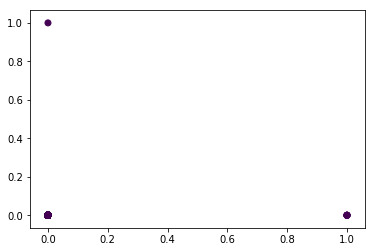

Comparing the assigned categories to the ones in the data:
col_0          0  1
1                  
Buren        139  0
Cleveland    189  0
Clinton      292  0
F_Roosevelt  124  0
Jackson      152  0
Johnson      100  1
Lincoln      156  1
Obama        323  0
Reagan       224  0
T_Roosevelt  392  0


In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))


# Random Forest

In [42]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()

train_rfc = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

add feature selection

#Trying Log Regression with Bag of Words

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

In [0]:
rfc = ensemble.RandomForestClassifier()

train = rfc.fit(X_train, y_train)

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

In [0]:
#Add XGBoost
#LightGBM

#Gradient Boost

In [0]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Unsupervised model

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(sentences, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.1, # drop words that occur in more than .1 the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )





In [0]:
for each in sentences:
  str(each)

In [0]:

#Applying the vectorizer
pres_vec =vectorizer.fit_transform(sentences[0])
print("Number of features: %d" % pres_vec.get_shape()[1])

#splitting into training and test sets
X_train_vec, X_test_vec= train_test_split(pres_vec, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_vec_read = X_train_vec.tocsr()

#number of sentences
n = X_train_vec_read.shape[0]
#A list of dictionaries, one per sentence
tfidf_bysent = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_vec_read.nonzero()):
    tfidf_bysent[i][terms[j]] = X_train_vec_read[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print(n)
print(tfidf_bysent)


In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_vec)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of sentences our solution considers similar, for the first five identified topics
sents_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(sents_by_component.loc[:,i].sort_values(ascending=False)[0:10])z
    




In [0]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])